# Pymaceuticals Inc.
---

### Analysis

- In this study, 249 mice were identified with squamouse cell carcinoma (SCC) and received treatment with variable drug regimens. During treatment, mice were observed and measured for tumor volume (mm3) over the course of 45 days with measurements occurring every 5 days. 
- When looking at the summary statistics of the overall data acquired during the study regarding tumor volume, two drugs stand out. Both Ramicane and Capomulin boast average tumor volumes of about 40 mm3 with standard deviations of right around 5.0, begin significantly lower than any other treatment in the data set, suggesting possible reduction in tumor volume over time. All other described treatments fall within a difference of 2 mm3 in average tumor volume of the placebo control group with standard deviations between 6 and 8, suggesting little to no reduction in tumor volume compared to the untreated placebo group as well as higher variability in results. Furthermore when looking at plotted total timepoints for each drug in the bar graphs, Ramicane and Capomulin have more observed timepoints (roughly 240) than the other drugs, which have around under 200. It is possible that more mice could've been treated with Ramicane and Capomulin resulting in more total timepoints, but it is also possible that due to tumor volume reduction, that more mice survived the 45 day treatment course resulting in more total timepoints for these two drugs.
- Conclusively, we are most concerned with the final tumor volume at the end of the study. The boxplot gives us a good comparison of these two drugs of interest against two other treatments, Ifubinol and Ceftamin. Similarily to overall averages, median final tumor volumes of the Ifubinol and Ceftamin can be seen as significantly higher than Ramicane and Capomulin with approximately 60 mm3 compared to approximately 36 mm3. IQRs for the Ifubinol and Ceftamin also appear larger those of Capomulin and Ramicane, suggesting more variable and spread out data correlating to our earlier findings in the summary statistics. Furthermore, when looking at outlier ranges, it can be seen visually, that upward outliers of Capomulin and Ramicane treatment are almost nearly equivalent to the bottom of outlier ranges for Ifubinol and Ceftamin suggesting a siginifcant difference in tumor volume results. Ifubinol does however, show one outlier with lower final tumor volume similar to the normal data set for the two better performing drugs, yet this is likely insignificant and possibly due to some other external factors.
- Finally line plots for individual mice treated with Capomulin or Ramicane can be examined to generally see a downward trend in tumor volume as time progresses. When considering other factors, such as weights influence on treatment success, the scatterplot with linear regression shows a positive correlation between the two variables. With a calculated correlation coefficient of r = 0.84, this would suggest that there is a strong correlation between the weight of the mice and the average observed tumor volume with lower weights seeing lower tumor average volumes and higher weights seeing higher average tumor volumes. This could be due to loss of tumor weight as volume of the tumor decreases. Alternatively drug treatment dosing was not described and if all mice are recieving the same dose of drug regardless of weight, there could be a weight to dosage factor at hand here where smaller mice are recieving more drug per body weight than a larger mouse gets the same dose. This upped dosage to weight ratio could in turn be providing lower average tumor measurements compared bigger mice with lower dosage to weight ratios.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Load and read csvs into Data Frames
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_data = pd.read_csv(mouse_metadata_path)
study_data = pd.read_csv(study_results_path)

# Merge into one dataframe and preview data
mouse_study_df = pd.merge(study_data, mouse_data, on="Mouse ID", how='left')

mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Number of mice
total_mice = len(mouse_study_df['Mouse ID'].unique())

total_mice

249

In [3]:
# Search for duplicate data based on Mouse ID and Timepoint
duplicates = mouse_study_df[mouse_study_df.duplicated(['Mouse ID', 'Timepoint'])]

duplicates['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Display duplicate data
duplicates_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] == 'g989']

duplicates_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Drop mouse IDs with duplicated data from our merged dataframe
mouse_study_cleaned = mouse_study_df.drop(list(duplicates_df.index))

mouse_study_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Check that total number of mice reflects that duplicates have been dropped
total_mice = len(mouse_study_cleaned['Mouse ID'].unique())

total_mice

248

## Summary Statistics

In [7]:
# Aggregated statistics of studies grouped by drug regimen and based on Tumor Volume data
drug_group_stats = mouse_study_cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(
    ['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume',
                                                             'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.',
                                                             'sem': 'Tumor Volume Std. Err.'})
drug_group_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

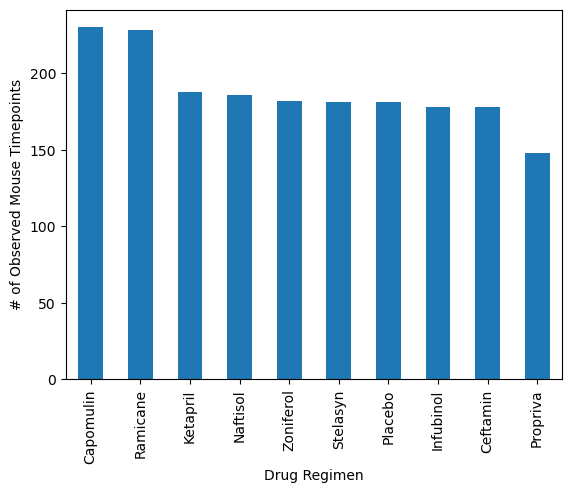

In [8]:
# Bar chart created using Pandas
mouse_drug_data = mouse_study_cleaned['Drug Regimen'].value_counts()

figure_1 = mouse_drug_data.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')

plt.show()

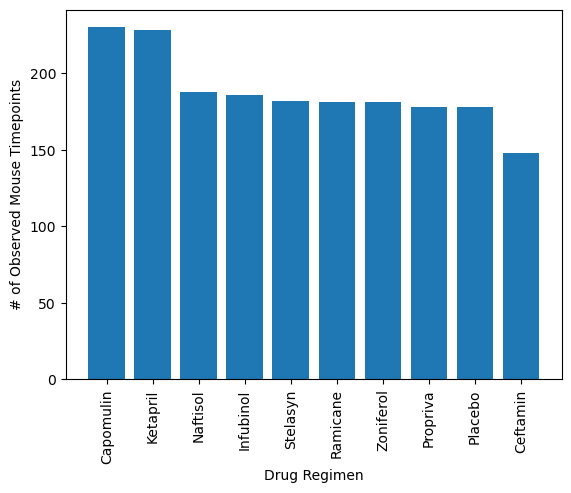

In [9]:
# Bar chart created using pyplot
mouse_timepoints = mouse_study_cleaned['Drug Regimen'].value_counts()
x_axis = np.arange(len(mouse_timepoints))

plt.bar(x_axis, mouse_timepoints, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mouse_study_cleaned['Drug Regimen'].unique(), rotation=90)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

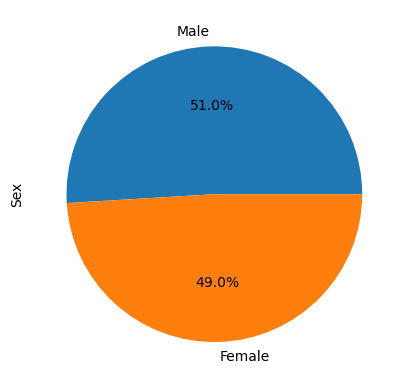

In [10]:
# Pie chart created using Pandas
mouse_sex = mouse_study_cleaned['Sex'].value_counts()

figure_2 = mouse_sex.plot(kind='pie', ylabel='Sex', autopct='%1.1f%%')

plt.show()

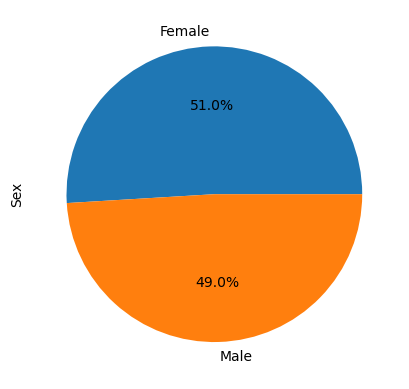

In [11]:
# Pie chart created using pyplot
labels = mouse_study_cleaned['Sex'].unique()
sizes = mouse_study_cleaned['Sex'].value_counts()

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers, and Boxplots

In [12]:
# Obtain greatest timepoint for each mouse ID
max_timepoint = mouse_study_cleaned.groupby('Mouse ID')['Timepoint'].max()

# Merge this dataframe with our original cleaned dataframe
max_time_df = pd.merge(mouse_study_cleaned, max_timepoint, on=['Mouse ID', 'Timepoint'], how='inner')

# Narrow down the dataframe to our drugs of interest with the .loc method
drugs_of_interest = max_time_df.loc[(max_time_df['Drug Regimen'] == 'Capomulin') |
                                    (max_time_df['Drug Regimen'] == 'Ramicane') |
                                    (max_time_df['Drug Regimen'] == 'Infubinol') |
                                    (max_time_df['Drug Regimen'] == 'Ceftamin')]


In [13]:
# List of drugs
treatments = drugs_of_interest['Drug Regimen'].unique()

# Empty list that iterated data will be appended to 
tumor_vol_data = []

for drug in treatments:
    
    # set a dataframe for current drug in iteration relevant to the tumor volume
    df = drugs_of_interest.loc[drugs_of_interest['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # Append this series data to the lists
    tumor_vol_data.append(list(df))

    # Calculate quartiles, iqr, upper and lower bounds, and outliers
    quartiles = df.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = df.loc[(df > upper_bound) | (df < lower_bound)]
    
    # Display each iterated drugs potential outliers
    print(f"{drug}'s potential outliers: {outliers}")

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


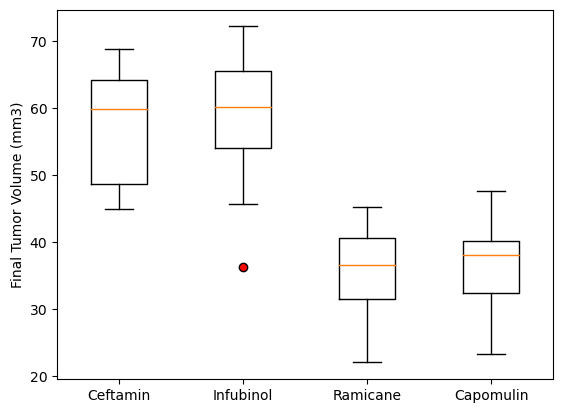

In [14]:
# Chart distributions of each treatment as a boxplot using acquired tumor volume data
fig, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data, flierprops={'marker': 'o', 'markerfacecolor': 'red'})
ax1.set_xticks(range(1, len([name for name in treatments]) + 1, 1), treatments)
ax1.set_ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

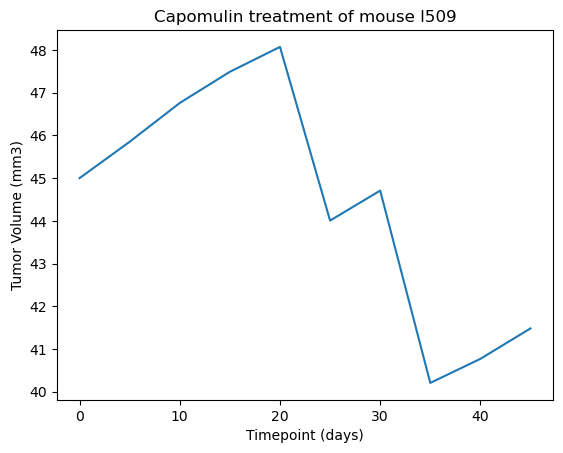

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# desired_mouse variable can be changed and code will run to plot according to that specific mouse and drug used for that mouse
desired_mouse = 'l509'

one_mouse = mouse_study_cleaned.loc[mouse_study_cleaned['Mouse ID'] == desired_mouse]

drug_used = one_mouse.iloc[1,4]

one_mouse.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)', title=f"{drug_used} treatment of mouse {desired_mouse}",
                xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)', legend=False)

plt.show()

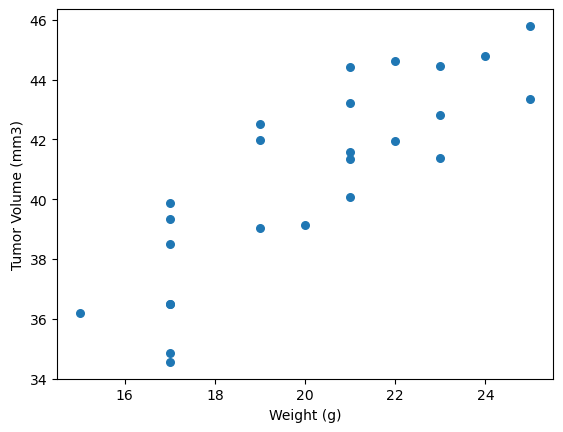

In [16]:
# Scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = mouse_study_cleaned.loc[mouse_study_cleaned['Drug Regimen'] == 'Capomulin']

tumor_vs_weight = capomulin_regimen[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']].groupby('Mouse ID').mean()

tumor_vs_weight.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', s=30)

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


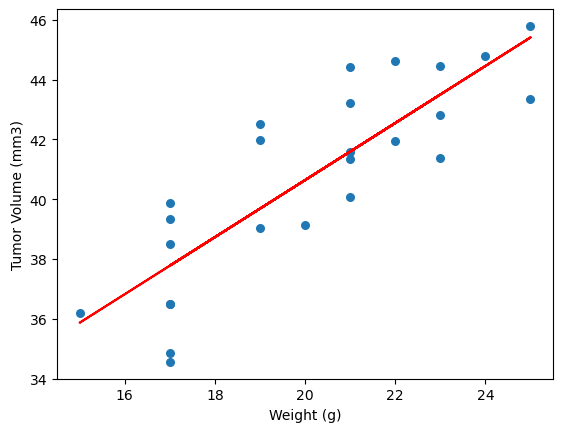

In [17]:
# Set x and y values 
x_values = tumor_vs_weight['Weight (g)']
y_values = tumor_vs_weight['Tumor Volume (mm3)']

# Calculate regression values based off of x and y
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Define regression values using y = mx + b
regress_values = (slope * x_values) + intercept

# Generate scatterplot and regression line
tumor_vs_weight.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', s=30)

plt.plot(x_values, regress_values, color='red')

# Display coefficient of correlation for weight to tumor volume
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}")

plt.show()